**Importing Library**

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

**Let's try to get areas uri**

In [2]:
headers = {'X-Auth-Token': '5faa46ae76ba473f855d25ba185eb625'}

In [3]:
uri = "https://api.football-data.org/v4/areas"
areas = requests.get(uri, headers = headers)
areas.status_code

200

In [4]:
#Converting to DF
areas = pd.DataFrame(areas)

In [5]:
areas.tail()

0
235  b'"id":2268,"name":"Yemen","countryCode":"YEM"...
236  b',"countryCode":"YUG","flag":null,"parentArea...
237  b'":null,"parentAreaId":2001,"parentArea":"Afr...
238  b'01,"parentArea":"Africa"},{"id":2272,"name":...
239                                             b'}]}'

In [6]:
#List and form a DF of all the competitions

competitions_response = requests.get("http://api.football-data.org/v4/competitions/", headers = headers)

if competitions_response.status_code == 200:
    # Decode the JSON response content from bytes to string
    json_data = competitions_response.content.decode('utf-8')
    
    # Parse the JSON data into a Python dictionary
    data_dict = json.loads(json_data)
    
    # Iterate over the dictionary and convert byte strings to regular strings
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            # Convert byte string to regular string using utf-8 encoding
            data_dict[key] = value.decode('utf-8')
    
    # Now data_dict contains the JSON data with byte strings converted to regular strings
    print(type(data_dict))
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    competitions = pd.DataFrame(series_)
else:
    # Print an error message if the request was unsuccessful
    print('Error:', competitions_response.status_code)

<class 'dict'>


**Dropping unnecessary columns and nan values, also restructuring to get only required data**

In [7]:
competitions.drop(["count", "filters"], axis = 1, inplace = True)
competitions.dropna(inplace = True)

In [8]:
competitions = pd.DataFrame.from_records(competitions["competitions"])
competitions["area"][0]
competitions["area"] = pd.DataFrame.from_records(competitions["area"])["name"].copy()
competitions.drop(["lastUpdated", "plan", "currentSeason"], inplace = True, axis = 1)

In [9]:
competitions

id           area                           name code    type  \
0   2013         Brazil  Campeonato Brasileiro Série A  BSA  LEAGUE   
1   2016        England                   Championship  ELC  LEAGUE   
2   2021        England                 Premier League   PL  LEAGUE   
3   2001         Europe          UEFA Champions League   CL     CUP   
4   2018         Europe          European Championship   EC     CUP   
5   2015         France                        Ligue 1  FL1  LEAGUE   
6   2002        Germany                     Bundesliga  BL1  LEAGUE   
7   2019          Italy                        Serie A   SA  LEAGUE   
8   2003    Netherlands                     Eredivisie  DED  LEAGUE   
9   2017       Portugal                  Primeira Liga  PPL  LEAGUE   
10  2152  South America              Copa Libertadores  CLI     CUP   
11  2014          Spain               Primera Division   PD  LEAGUE   
12  2000          World                 FIFA World Cup   WC     CUP   

                                        emblem  numberOfAvailableSeasons  
0     https://crests.football-data.org/764.svg                         8  
1     https://crests.football-data.org/ELC.png                         7  
2      https://crests.football-data.org/PL.png                       125  
3      https://crests.football-data.org/CL.png                        44  
4     https://crests.football-data.org/EUR.svg                        17  
5     https://crests.football-data.org/FL1.png                        80  
6     https://crests.football-data.org/BL1.png                        61  
7      https://crests.football-data.org/SA.png                        92  
8      https://crests.football-data.org/ED.png                        68  
9     https://crests.football-data.org/PPL.png                        75  
10    https://crests.football-data.org/CLI.svg                         4  
11     https://crests.football-data.org/PD.png                        93  
12  https://crests.football-data.org/qatar.png                        22

**Getting PL standings data, and restructuring it**

In [10]:
uri = "http://api.football-data.org/v4/competitions/PL/standings"
pl_standings = requests.get(uri, headers = headers)

**Let's convert it into readable form**

In [11]:
if pl_standings.status_code == 200:
    json_data = pl_standings.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    print(type(data_dict))
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    pl_standings_ = pd.DataFrame(series_)
else:
    print('Error:', pl_standings.status_code)

<class 'dict'>


In [12]:
pl_standings_ = pd.DataFrame.from_records(pl_standings_.T[0]["standings"])

In [13]:
pl_standings_ = pd.DataFrame.from_records(pl_standings_["table"])

In [14]:
pl_standings_teams = pd.DataFrame.from_records(pl_standings_["team"])

In [15]:
pl_standings_["team"] = pl_standings_teams["name"].copy()

In [16]:
pl_standings_.drop(["form", "goalDifference"], inplace = True, axis = 1)

In [17]:
pl_standings_.head(1)

position                team  playedGames  won  draw  lost  points  \
0         1  Manchester City FC           32   22     7     3      73   

   goalsFor  goalsAgainst  
0        76            32

**Let's implement the same and create for top 5 leagues in Europe**

_Note: Laliga, Bundesliga, Serie A, Ligue1_

In [18]:
#Laliga

uri = "http://api.football-data.org/v4/competitions/PD/standings"
laliga_standings = requests.get(uri, headers = headers)

if laliga_standings.status_code == 200:
    json_data = laliga_standings.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    laliga_standings_ = pd.DataFrame(series_)
else:
    print('Error:', laliga_standings.status_code)

In [19]:
laliga_standings_ = pd.DataFrame.from_records(laliga_standings_.T[0]["standings"])
laliga_standings_ = pd.DataFrame.from_records(laliga_standings_["table"])

laliga_standings_teams = pd.DataFrame.from_records(laliga_standings_["team"])
laliga_standings_["team"] = laliga_standings_teams["name"].copy()
laliga_standings_.drop(["form", "goalDifference"], inplace = True, axis = 1)

laliga_standings_.head(1)

position            team  playedGames  won  draw  lost  points  goalsFor  \
0         1  Real Madrid CF           31   24     6     1      78        67   

   goalsAgainst  
0            20

In [20]:
#Serie A

uri = "http://api.football-data.org/v4/competitions/SA/standings"
serieA_standings = requests.get(uri, headers = headers)

if serieA_standings.status_code == 200:
    json_data = serieA_standings.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    serieA_standings_ = pd.DataFrame(series_)
else:
    print('Error:', serieA_standings.status_code)

In [21]:
serieA_standings_ = pd.DataFrame.from_records(serieA_standings_.T[0]["standings"])
serieA_standings_ = pd.DataFrame.from_records(serieA_standings_["table"])

serieA_standings_teams = pd.DataFrame.from_records(serieA_standings_["team"])
serieA_standings_["team"] = serieA_standings_teams["name"].copy()
serieA_standings_.drop(["form", "goalDifference"], inplace = True, axis = 1)

serieA_standings_.head(1)

position                      team  playedGames  won  draw  lost  points  \
0         1  FC Internazionale Milano           32   26     5     1      83   

   goalsFor  goalsAgainst  
0        77            17

In [22]:
#Bundesliga

uri = "http://api.football-data.org/v4/competitions/BL1/standings"
bundesliga_standings = requests.get(uri, headers = headers)

if bundesliga_standings.status_code == 200:
    json_data = bundesliga_standings.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    bundesliga_standings_ = pd.DataFrame(series_)
else:
    print('Error:', serieA_standings.status_code)

In [23]:
bundesliga_standings_ = pd.DataFrame.from_records(bundesliga_standings_.T[0]["standings"])
bundesliga_standings_ = pd.DataFrame.from_records(bundesliga_standings_["table"])

bundesliga_standings_teams = pd.DataFrame.from_records(bundesliga_standings_["team"])
bundesliga_standings_["team"] = bundesliga_standings_teams["name"].copy()
bundesliga_standings_.drop(["form", "goalDifference"], inplace = True, axis = 1)

bundesliga_standings_.head(1)

position                 team  playedGames  won  draw  lost  points  \
0         1  Bayer 04 Leverkusen           29   25     4     0      79   

   goalsFor  goalsAgainst  
0        74            19

In [24]:
#Ligue 1

uri = "http://api.football-data.org/v4/competitions/FL1/standings"
ligue1_standings = requests.get(uri, headers = headers)

if ligue1_standings.status_code == 200:
    json_data = ligue1_standings.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    ligue1_standings_ = pd.DataFrame(series_)
else:
    print('Error:', ligue1_standings.status_code)

In [25]:
ligue1_standings_ = pd.DataFrame.from_records(ligue1_standings_.T[0]["standings"])
ligue1_standings_ = pd.DataFrame.from_records(ligue1_standings_["table"])

ligue1_standings_teams = pd.DataFrame.from_records(ligue1_standings_["team"])
ligue1_standings_["team"] = ligue1_standings_teams["name"].copy()
ligue1_standings_.drop(["form", "goalDifference"], inplace = True, axis = 1)

ligue1_standings_.head(1)

position                    team  playedGames  won  draw  lost  points  \
0         1  Paris Saint-Germain FC           28   18     9     1      63   

   goalsFor  goalsAgainst  
0        65            24

**Getting teams list**

In [26]:
uri = "http://api.football-data.org/v4/teams"
headers = {'X-Auth-Token': '5faa46ae76ba473f855d25ba185eb625'}

response = requests.get(uri, headers = headers)

if response.status_code == 200:
    json_data = response.content.decode('utf-8')    
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    print(type(data_dict))
    series_ = {key: pd.Series(values) for key, values in data_dict.items()}
    teams = pd.DataFrame(series_)
else:
    print('Error:', response.status_code)

<class 'dict'>


**Removing unnecessary columns and NaN and Null values**

In [27]:
teams.drop(["filters", "count"], axis = 1, inplace = True)
teams.dropna(inplace = True)

In [28]:
teams.head()

teams
0  {'id': 1, 'name': '1. FC Köln', 'shortName': '...
1  {'id': 2, 'name': 'TSG 1899 Hoffenheim', 'shor...
2  {'id': 3, 'name': 'Bayer 04 Leverkusen', 'shor...
3  {'id': 4, 'name': 'Borussia Dortmund', 'shortN...
4  {'id': 5, 'name': 'FC Bayern München', 'shortN...

**As we can see, teams has dict type of data, so, let's restructure them as well into DF**

In [29]:
teams_ = pd.DataFrame.from_records(teams["teams"])

In [30]:
teams_.columns

Index(['id', 'name', 'shortName', 'tla', 'crest', 'address', 'website',
       'founded', 'clubColors', 'venue', 'lastUpdated'],
      dtype='object')

**Removing unnecessary colums**

In [31]:
teams_.drop(["shortName", "address", "website", "lastUpdated"], axis = 1, inplace = True)

In [32]:
teams_.head()

id                 name  tla                                   crest  \
0   1           1. FC Köln  KOE  https://crests.football-data.org/1.png   
1   2  TSG 1899 Hoffenheim  TSG  https://crests.football-data.org/2.png   
2   3  Bayer 04 Leverkusen  B04  https://crests.football-data.org/3.png   
3   4    Borussia Dortmund  BVB  https://crests.football-data.org/4.png   
4   5    FC Bayern München  FCB  https://crests.football-data.org/5.svg   

   founded           clubColors                venue  
0     1948          Red / White  RheinEnergieSTADION  
1     1921         Blue / White        PreZero Arena  
2     1904  Red / White / Black             BayArena  
3     1909       Black / Yellow    Signal Iduna Park  
4     1900   Red / White / Blue        Allianz Arena

**Implementing Similar to areas**

In [33]:
response = requests.get("https://api.football-data.org/v4/areas", headers = headers)

if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_area = {key: pd.Series(values) for key, values in data_dict.items()}
    areas = pd.DataFrame(series_area)
else:
    print('Error:', response.status_code)

In [34]:
areas.drop(["count", "filters"], axis = 1, inplace = True)
areas_ = pd.DataFrame.from_records(areas["areas"])

In [35]:
areas_[areas_["flag"].notnull()].count()

id              46
name            46
countryCode     46
flag            46
parentAreaId    46
parentArea      46
dtype: int64

**Since there are only 46 out of 270+ has flags, let's drop it**

In [36]:
areas_.drop(["flag"], axis = 1, inplace = True)

In [38]:
areas_.head(1)

id         name countryCode  parentAreaId parentArea
0  2000  Afghanistan         AFG        2014.0       Asia

**We have recorded some datasets for teams and areas as of now, next let's check about the data we might get from api and visualize the same**

**We shall get the top goal scorers from SerieA**

In [39]:
response = requests.get("http://api.football-data.org/v4/competitions/SA/scorers", headers = headers)
response.status_code

200

In [40]:
if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    series_scorer = {key: pd.Series(values) for key, values in data_dict.items()}
    serieA_scorers = pd.DataFrame(series_scorer)
else:
    print('Error:', response.status_code)

In [41]:
serieA_scorers.drop(["count", "filters", "season", "competition"], axis = 1, inplace = True)
serieA_scorers.dropna(inplace = True)

In [42]:
scorersSA = pd.DataFrame.from_records(serieA_scorers["scorers"])
scoring_players_SA = pd.DataFrame.from_records(scorersSA["player"])
scoring_players_SA.drop(["firstName", "lastName", "dateOfBirth", "position", "shirtNumber", "lastUpdated"], axis = 1, inplace = True)

In [43]:
scoring_players_team_SA = pd.DataFrame.from_records(scorersSA["team"])
scoring_players_team_SA.drop(["address", "website", "founded", "clubColors", "venue", "lastUpdated"], axis = 1, inplace = True)

**Need to replace player and team Series(columns) with the player_name and team_name**

In [44]:
scorersSA["player"] = scoring_players_SA["name"].copy()
scorersSA["team"] = scoring_players_team_SA["shortName"].copy()

In [56]:
#Adding Nationality to the data as well
scorersSA["country"] = scoring_players_SA["nationality"]

In [57]:
scorersSA

player      team  playedMatches  goals  assists  penalties  \
0     Lautaro Martínez     Inter             29     23        4        2.0   
1       Dušan Vlahović  Juventus             27     15        3        2.0   
2       Victor Osimhen    Napoli             21     13        4        2.0   
3       Olivier Giroud     Milan             30     13        7        4.0   
4   Albert Guðmundsson     Genoa             30     13        4        4.0   
5         Duván Zapata    Torino             31     12        5        NaN   
6         Paulo Dybala      Roma             24     12        7        6.0   
7       Joshua Zirkzee   Bologna             30     11        5        2.0   
8  Marcus Thuram-Ulien     Inter             30     11        7        NaN   
9     Hakan Çalhanoğlu     Inter             29     11        3        9.0   

       country  
0    Argentina  
1       Serbia  
2      Nigeria  
3       France  
4      Iceland  
5     Colombia  
6    Argentina  
7  Netherlands  
8       France  
9       Turkey

**Let's try the same with PL scorers**

In [58]:
response = requests.get("http://api.football-data.org/v4/competitions/PL/scorers", headers = headers)
if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    premier_scorer = {key: pd.Series(values) for key, values in data_dict.items()}
    plscorers = pd.DataFrame(premier_scorer)
else:
    print('Error:', response.status_code)

In [59]:
plscorers.drop(["count", "filters", "competition", "season"], axis = 1, inplace = True)
plscorers.dropna(inplace = True)

In [60]:
scorersPL = pd.DataFrame.from_records(plscorers["scorers"])

In [61]:
scoringplayerPL = pd.DataFrame.from_records(scorersPL["player"])
playerteamPL = pd.DataFrame.from_records(scorersPL["team"])

In [62]:
scoringplayerPL.drop(["firstName", "lastName", "dateOfBirth", "position", "shirtNumber", "lastUpdated"], axis = 1, inplace = True)
playerteamPL.drop(["address", "website", "founded", "clubColors", "venue", "lastUpdated"], axis = 1, inplace = True)

In [63]:
scorersPL["player"] = scoringplayerPL["name"].copy()
scorersPL["team"] = playerteamPL["shortName"].copy()
scorersPL["country"] = scoringplayerPL["nationality"].copy()

In [64]:
scorersPL

player         team  playedMatches  goals  assists  penalties  \
0   Erling Haaland     Man City             27     20        6        4.0   
1      Cole Palmer      Chelsea             30     20        9        9.0   
2    Ollie Watkins  Aston Villa             32     19       10        NaN   
3  Dominic Solanke  Bournemouth             32     17        3        1.0   
4   Alexander Isak    Newcastle             25     17        1        4.0   
5    Mohamed Salah    Liverpool             26     17        9        5.0   
6     Jarrod Bowen     West Ham             31     15        5        NaN   
7    Heung-min Son    Tottenham             29     15        9        1.0   
8      Bukayo Saka      Arsenal             30     14        8        5.0   
9       Phil Foden     Man City             32     14        7        NaN   

       country  
0       Norway  
1      England  
2      England  
3      England  
4       Sweden  
5        Egypt  
6      England  
7  South Korea  
8      England  
9      England

**Let us do the same task with top 5 leagues, and do some bivarient analysis**

In [65]:
#Laliga

response = requests.get("http://api.football-data.org/v4/competitions/PD/scorers", headers = headers)
if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    laliga_scorer = {key: pd.Series(values) for key, values in data_dict.items()}
    lascorers = pd.DataFrame(laliga_scorer)
else:
    print('Error:', response.status_code)

In [66]:
lascorers.drop(["count", "filters", "competition", "season"], axis = 1, inplace = True)
lascorers.dropna(inplace = True)

scorersLA = pd.DataFrame.from_records(lascorers["scorers"])

scoringplayerLA = pd.DataFrame.from_records(scorersLA["player"])
playerteamLA = pd.DataFrame.from_records(scorersLA["team"])

scoringplayerLA.drop(["firstName", "lastName", "dateOfBirth", "position", "shirtNumber", "lastUpdated"], axis = 1, inplace = True)
playerteamLA.drop(["address", "website", "founded", "clubColors", "venue", "lastUpdated"], axis = 1, inplace = True)

scorersLA["player"] = scoringplayerLA["name"].copy()
scorersLA["team"] = playerteamLA["shortName"].copy()
scorersLA["country"] = scoringplayerLA["nationality"].copy()

In [67]:
scorersLA

player         team  playedMatches  goals  assists  penalties  \
0        Artem Dovbyk       Girona             29     17        5        4.0   
1     Jude Bellingham  Real Madrid             25     16        4        1.0   
2        Ante Budimir      Osasuna             31     16        2        3.0   
3       Borja Mayoral       Getafe             27     15        1        4.0   
4       Álvaro Morata       Atleti             28     14        2        NaN   
5   Alexander Sørloth   Villarreal             28     14        5        NaN   
6      Gorka Guruzeta     Athletic             30     13        4        NaN   
7  Robert Lewandowski        Barça             28     13        7        3.0   
8   Antoine Griezmann       Atleti             28     13        6        4.0   
9     Vinicius Junior  Real Madrid             22     12        5        NaN   

   country  
0  Ukraine  
1  England  
2  Croatia  
3    Spain  
4    Spain  
5   Norway  
6    Spain  
7   Poland  
8   France  
9   Brazil

In [71]:
#Bundesliga

response = requests.get("http://api.football-data.org/v4/competitions/BL1/scorers", headers = headers)
if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    bliga_scorer = {key: pd.Series(values) for key, values in data_dict.items()}
    blscorers = pd.DataFrame(bliga_scorer)
else:
    print('Error:', response.status_code)

In [72]:
blscorers.drop(["count", "filters", "competition", "season"], axis = 1, inplace = True)
blscorers.dropna(inplace = True)

scorersBL = pd.DataFrame.from_records(blscorers["scorers"])

scoringplayerBL = pd.DataFrame.from_records(scorersBL["player"])
playerteamBL = pd.DataFrame.from_records(scorersBL["team"])

scoringplayerBL.drop(["firstName", "lastName", "dateOfBirth", "position", "shirtNumber", "lastUpdated"], axis = 1, inplace = True)
playerteamBL.drop(["address", "website", "founded", "clubColors", "venue", "lastUpdated"], axis = 1, inplace = True)

scorersBL["player"] = scoringplayerBL["name"].copy()
scorersBL["team"] = playerteamBL["shortName"].copy()
scorersBL["country"] = scoringplayerBL["nationality"].copy()

In [73]:
#Ligue1

response = requests.get("http://api.football-data.org/v4/competitions/FL1/scorers", headers = headers)
if response.status_code == 200:
    json_data = response.content.decode('utf-8')
    data_dict = json.loads(json_data)
    
    for key, value in data_dict.items():
        if isinstance(value, bytes):
            data_dict[key] = value.decode('utf-8')
    
    ligue1_scorer = {key: pd.Series(values) for key, values in data_dict.items()}
    ligscorers = pd.DataFrame(ligue1_scorer)
else:
    print('Error:', response.status_code)

In [74]:
ligscorers.drop(["count", "filters", "competition", "season"], axis = 1, inplace = True)
ligscorers.dropna(inplace = True)

scorersL1 = pd.DataFrame.from_records(ligscorers["scorers"])

scoringplayerL1 = pd.DataFrame.from_records(scorersL1["player"])
playerteamL1 = pd.DataFrame.from_records(scorersL1["team"])

scoringplayerL1.drop(["firstName", "lastName", "dateOfBirth", "position", "shirtNumber", "lastUpdated"], axis = 1, inplace = True)
playerteamL1.drop(["address", "website", "founded", "clubColors", "venue", "lastUpdated"], axis = 1, inplace = True)

scorersL1["player"] = scoringplayerL1["name"].copy()
scorersL1["team"] = playerteamL1["shortName"].copy()
scorersL1["country"] = scoringplayerL1["nationality"].copy()

**All the Dataframe created till now**

* _ligue1_standings__
* _scorersL1_
* _bundesliga_standings__
* _scorersBL_
* _laliga_standings__
* _scorersLA_
* _pl_standings__
* _scorersPL_
* _serieA_standings__
* _scorersSA_
* _competitions_
* *teams_*
* *areas_*

**Visualization**

In [75]:
scorersPL.columns

Index(['player', 'team', 'playedMatches', 'goals', 'assists', 'penalties',
       'country'],
      dtype='object')

In [81]:
fig = plt.figure(figsize = (27, 9))

<Figure size 2700x900 with 0 Axes>

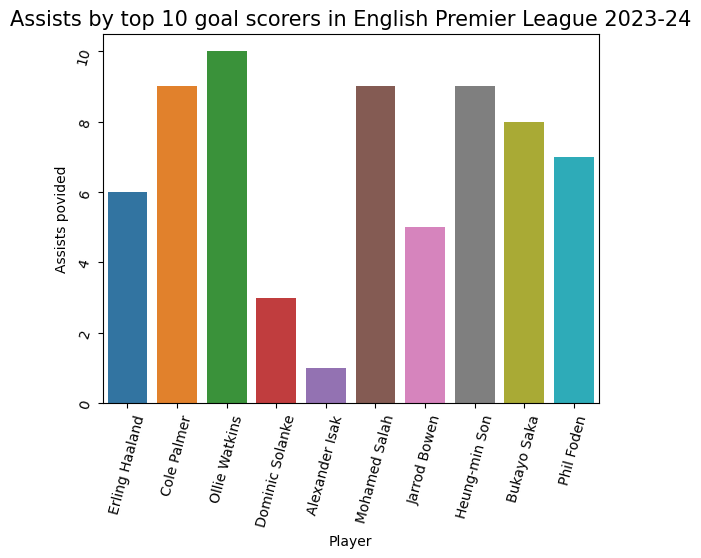

In [106]:
plt.title("Assists by top 10 goal scorers in English Premier League 2023-24", size = 15)
ax = sns.barplot(data = scorersPL, x = "player", y = "assists")
plt.xlabel("Player")
plt.ylabel("Assists povided")
plt.xticks(rotation = 75)
plt.yticks(rotation = 75)
plt.show()

In [94]:
scorersBL.head()

player        team  playedMatches  goals  assists  penalties  \
0         Harry Kane      Bayern             29     32        7        3.0   
1    Sehrou Guirassy   Stuttgart             23     25        3        4.0   
2        Loïs Openda  RB Leipzig             29     22        7        2.0   
3        Deniz Undav   Stuttgart             25     16        9        NaN   
4  Ermedin Demirovic    Augsburg             28     15        9        3.0   

              country  
0             England  
1              Guinea  
2             Belgium  
3             Germany  
4  Bosnia-Herzegovina

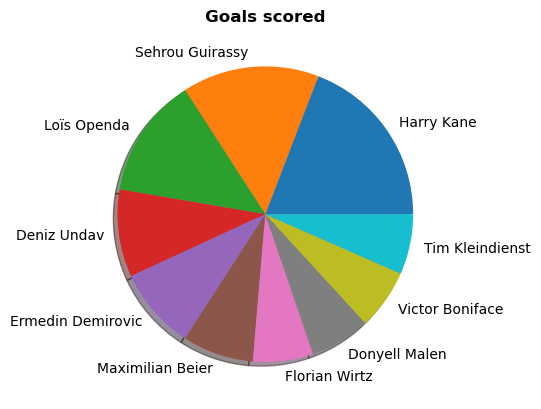

In [128]:
plt.pie(scorersBL["goals"], labels = scorersBL["player"], shadow = True)
plt.title("Goals scored", size = 12, fontweight = "bold")
plt.show()

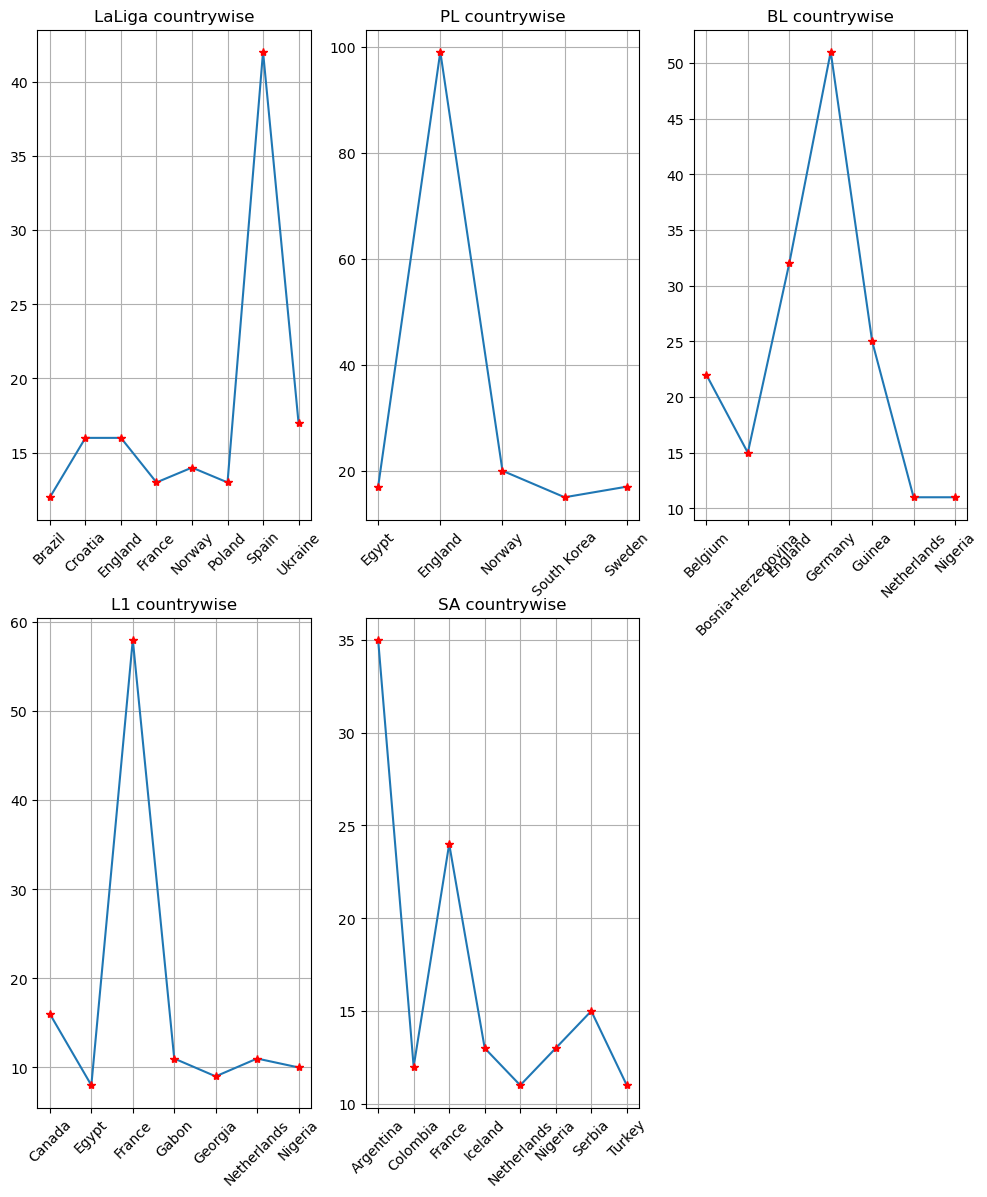

In [193]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 14))
countrywiseLA = scorersLA.groupby(by = "country").sum().reset_index()
countrywisePL = scorersPL.groupby(by = "country").sum().reset_index()
countrywiseBL = scorersBL.groupby(by = "country").sum().reset_index()
countrywiseL1 = scorersL1.groupby(by = "country").sum().reset_index()
countrywiseSA = scorersSA.groupby(by = "country").sum().reset_index()

axis[0, 0].plot(countrywiseLA["country"], countrywiseLA["goals"])
axis[0, 0].plot(countrywiseLA["goals"], "r*")
axis[0, 0].set_title("LaLiga countrywise")
axis[0, 0].tick_params(axis = 'x', rotation = 45)
axis[0, 0].grid()

axis[0, 1].plot(countrywisePL["country"], countrywisePL["goals"])
axis[0, 1].plot(countrywisePL["goals"], "r*")
axis[0, 1].set_title("PL countrywise")
axis[0, 1].tick_params(axis = 'x', rotation = 45)
axis[0, 1].grid()

axis[0, 2].plot(countrywiseBL["country"], countrywiseBL["goals"])
axis[0, 2].plot(countrywiseBL["goals"], "r*")
axis[0, 2].set_title("BL countrywise")
axis[0, 2].tick_params(axis = 'x', rotation = 45)
axis[0, 2].grid()

axis[1, 0].plot(countrywiseL1["country"], countrywiseL1["goals"])
axis[1, 0].plot(countrywiseL1["goals"], "r*")
axis[1, 0].set_title("L1 countrywise")
axis[1, 0].tick_params(axis = 'x', rotation = 45)
axis[1, 0].grid()

axis[1, 1].plot(countrywiseSA["country"], countrywiseSA["goals"])
axis[1, 1].plot(countrywiseSA["goals"], "r*")
axis[1, 1].set_title("SA countrywise")
axis[1, 1].tick_params(axis = 'x', rotation = 45)
axis[1, 1].grid()

fig.delaxes(axis[1, 2])
plt.show()

**We can observe that most of the goals from top 10 players is scored by the players of the country where league is from in top 5 leagues**

*Fun Fact* : *Defensive League in Italy has no striker in top 10 players*

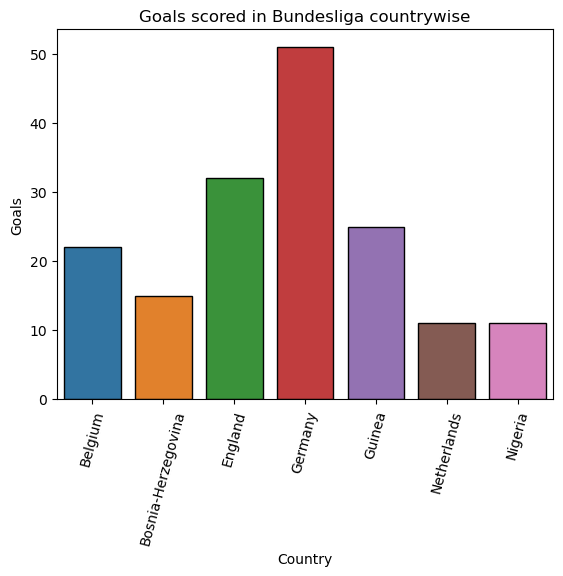

In [187]:
ax = sns.barplot(data = countrywiseBL, x = "country", y = "goals", edgecolor = "black")
plt.title("Goals scored in Bundesliga countrywise")
plt.xlabel("Country")
plt.ylabel("Goals")
plt.xticks(rotation = 75)
plt.show()

In [191]:
countrywiseSA

country                             player        team  playedMatches  \
0    Argentina       Lautaro MartínezPaulo Dybala   InterRoma             53   
1     Colombia                       Duván Zapata      Torino             31   
2       France  Olivier GiroudMarcus Thuram-Ulien  MilanInter             60   
3      Iceland                 Albert Guðmundsson       Genoa             30   
4  Netherlands                     Joshua Zirkzee     Bologna             30   
5      Nigeria                     Victor Osimhen      Napoli             21   
6       Serbia                     Dušan Vlahović    Juventus             27   
7       Turkey                   Hakan Çalhanoğlu       Inter             29   

   goals  assists  penalties  
0     35       11        8.0  
1     12        5        0.0  
2     24       14        4.0  
3     13        4        4.0  
4     11        5        2.0  
5     13        4        2.0  
6     15        3        2.0  
7     11        3        9.0

**Need to get previous few years list to make further analysis**

Project Continuation will be done after that